In [1]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')
# Install required packages
!pip install -U sentence-transformers
# Import necessary libraries
import pandas as pd
from collections import Counter
from sentence_transformers import SentenceTransformer
import numpy as np
import sklearn
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score,
    mean_squared_error, mean_absolute_error, classification_report, confusion_matrix
)
import seaborn as sn
import matplotlib.pyplot as plt
# Load datasets
# Adjusting to the comma-separated format and proper headers
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/final codes/train_350.csv")  # Train dataset has headers
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/final codes/mal_full_offe_test_MODIFY (1).csv", header=None, names=["text", "label"])  # Test dataset lacks headers
# Prepare data for training and testing
train_sent_m = train['text'].tolist()
train_label_m = train['label'].tolist()

test_sent_m = test['text'].tolist()
test_label_m = test['label'].tolist()
# Encode labels
from sklearn import preprocessing

# Initialize and fit LabelEncoder on the training labels
le = preprocessing.LabelEncoder()
train_labels_encoded = le.fit_transform(train_label_m)

# Add "unknown" explicitly to LabelEncoder classes
le.classes_ = np.append(le.classes_, "unknown")

# Ensure test labels only include known labels
# Replace unknown labels with "unknown" for proper transformation
known_labels = set(le.classes_)  # Includes "unknown" now
test_label_m_filtered = [label if label in known_labels else "unknown" for label in test_label_m]

# Encode the filtered test labels
test_label_m_filtered = np.array(test_label_m_filtered)  # Convert to numpy array
test_labels_encoded = le.transform(test_label_m_filtered)


# Verify encoding
print("Classes in LabelEncoder:", le.classes_)
# Load multilingual embedding model
trans_model = SentenceTransformer('bert-base-multilingual-cased')
trans_model.max_seq_length = 128  # Reduce sequence length to speed up processing
# Generate embeddings
train_sentence_embeddings = trans_model.encode(train_sent_m)
test_sentence_embeddings = trans_model.encode(test_sent_m)
# Compute class weights to handle imbalance
class_weights = sklearn.utils.class_weight.compute_class_weight(
    'balanced', classes=np.unique(train_labels_encoded), y=train_labels_encoded
)
print("Computed class weights:", class_weights)



Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-c

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Computed class weights: [ 0.22996382 14.73545455 15.00833333  8.33367609  2.51888112]



Evaluation Scores:
Macro Metrics:
Accuracy: 0.736
Precision: 0.408
Recall: 0.607
F1 Score: 0.454

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      1765
           1       0.16      0.58      0.25        31
           2       0.13      0.38      0.19        45
           3       0.20      0.45      0.28       103
           4       0.60      0.88      0.71       157

    accuracy                           0.74      2101
   macro avg       0.41      0.61      0.45      2101
weighted avg       0.86      0.74      0.78      2101

Predictions saved to 'Logistic_regression_predictions.csv'.


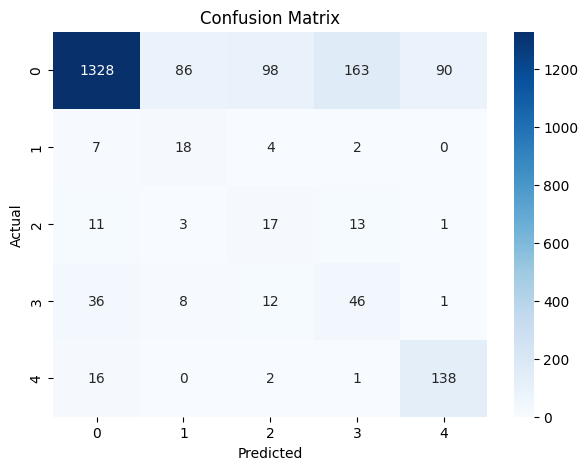

Model saved to 'logistic _Regression.pkl'.


In [ ]:
# Train Logistic Regression model
# Logistic Regression is a statistical model used for binary classification. It predicts the probability of a data point belonging to one of two classes based on
# input features, using a logistic (S-shaped) function to map predictions to probabilities.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import pickle

# Map class weights into dictionary format
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
# class_weight_dict = {0:0.22607331, 1:23.54117647 ,2:13.69505703 ,3:17.07014218 ,4:2.484}


# Initialize and train the model
model = LogisticRegression(class_weight=class_weight_dict, max_iter=500)
model.fit(train_sentence_embeddings, train_labels_encoded)

# Predict on the test data
expected = test_labels_encoded
predicted = model.predict(test_sentence_embeddings)

# Handle unseen labels in the test data
# Map unseen test labels to a default class to avoid evaluation errors
unique_train_labels = np.unique(train_labels_encoded)
filtered_expected = [label if label in unique_train_labels else -1 for label in expected]
filtered_predicted = [pred if pred in unique_train_labels else -1 for pred in predicted]

# Remove the default class (-1) from filtered labels for evaluation
filtered_expected = np.array(filtered_expected)
filtered_predicted = np.array(filtered_predicted)
valid_indices = filtered_expected != -1
filtered_expected = filtered_expected[valid_indices]
filtered_predicted = filtered_predicted[valid_indices]

# Evaluate model
print("\nEvaluation Scores:")
accuracy = accuracy_score(filtered_expected, filtered_predicted)
recall = recall_score(filtered_expected, filtered_predicted, average="macro", zero_division=1)
precision = precision_score(filtered_expected, filtered_predicted, average="macro", zero_division=1)
f1 = f1_score(filtered_expected, filtered_predicted, average="macro", zero_division=1)

print("Macro Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# Classification Report
# Fix LabelEncoder issue by fitting it on all possible labels before inverse_transform
all_possible_labels = np.unique(np.concatenate((train_labels_encoded, test_labels_encoded)))
le.fit(all_possible_labels)

# Convert target_names to strings
target_names = list(map(str, le.inverse_transform(unique_train_labels)))

print("\nClassification Report:")
print(classification_report(filtered_expected, filtered_predicted, labels=unique_train_labels, target_names=target_names, zero_division=1))

# Save predictions to a CSV file
# Fix: Ensure correct alignment of test inputs and predicted outputs in the DataFrame
try:
    predictions = le.inverse_transform(predicted)
except ValueError:
    predictions = ["unseen_label" if pred not in unique_train_labels else le.inverse_transform([pred])[0] for pred in predicted]

classified_df = pd.DataFrame({'tweets': test_sent_m, 'actual_label': test_label_m, 'predictions': list(predictions)})
classified_df.to_csv('Logistic_regression_predictions.csv', index=False)
print("Predictions saved to 'Logistic_regression_predictions.csv'.")

# Plot and save confusion matrix
cfm = confusion_matrix(filtered_expected, filtered_predicted, labels=unique_train_labels)
df_cfm = pd.DataFrame(cfm, index=target_names, columns=target_names)
plt.figure(figsize=(7, 5))
cfm_plot = sn.heatmap(df_cfm, annot=True, fmt='g', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("cfm_LR.png")
plt.show()

# # Save the trained model
# pkl_filename = "logistic _Regression.pkl"
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(model, file)
# print(f"Model saved to '{pkl_filename}'.")

Evaluation Scores:
Macro Metrics:
Accuracy: 0.205
Precision: 0.288
Recall: 0.423
F1 Score: 0.190

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.14      0.24      1765
           1       0.03      0.77      0.06        31
           2       0.08      0.13      0.10        45
           3       0.04      0.22      0.06       103
           4       0.34      0.85      0.49       157

    accuracy                           0.21      2101
   macro avg       0.29      0.42      0.19      2101
weighted avg       0.83      0.21      0.25      2101

Predictions saved to 'Naive_Bayes_corrected_predictions.csv'.


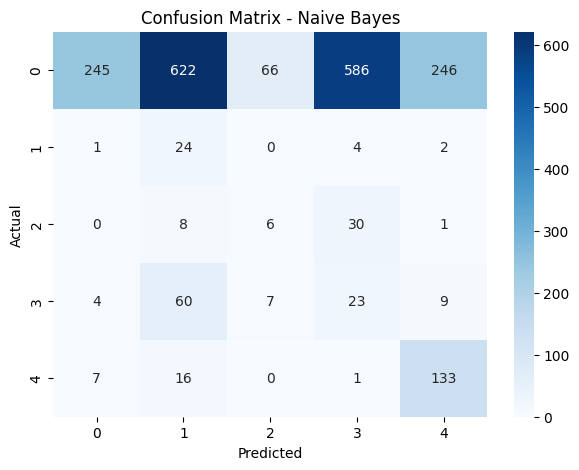

Model saved to 'Naive_Bayes.pkl'.


In [ ]:
# Naive Bayes Implementation
# Naive Bayes is a probabilistic model based on Bayes' Theorem. It assumes that features are independent of each other (naive assumption) and calculates the
# likelihood of a data point belonging to a specific class based on these probabilities. It works well with text data and simple datasets.
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    classification_report, confusion_matrix
)
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

# Model Initialization
model = GaussianNB()  # You can switch to ComplementNB() for other NB variations.
model.fit(train_sentence_embeddings, train_labels_encoded)

# Use test labels and embeddings for evaluation
expected = test_labels_encoded  # Corrected variable
predicted = model.predict(test_sentence_embeddings)  # Use test embeddings

# Ensure consistent handling of unseen labels
unique_train_labels = np.unique(train_labels_encoded)
filtered_expected = [label if label in unique_train_labels else -1 for label in expected]
filtered_predicted = [pred if pred in unique_train_labels else -1 for pred in predicted]

filtered_expected = np.array(filtered_expected)
filtered_predicted = np.array(filtered_predicted)
valid_indices = filtered_expected != -1
filtered_expected = filtered_expected[valid_indices]
filtered_predicted = filtered_predicted[valid_indices]

# Evaluation Scores
print("Evaluation Scores:")
accuracy = accuracy_score(filtered_expected, filtered_predicted)
recall = recall_score(filtered_expected, filtered_predicted, average="macro", zero_division=1)
precision = precision_score(filtered_expected, filtered_predicted, average="macro", zero_division=1)
f1 = f1_score(filtered_expected, filtered_predicted, average="macro", zero_division=1)

print("Macro Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# Classification Report
# Use unique_train_labels to ensure alignment with model output
target_names = list(map(str, le.inverse_transform(unique_train_labels)))

print("\nClassification Report:")
print(classification_report(filtered_expected, filtered_predicted, labels=unique_train_labels, target_names=target_names, zero_division=1))

# Save Predictions with Updated Logic
try:
    predictions = le.inverse_transform(predicted)  # Decode predictions
except ValueError:
    # Handle unseen labels
    predictions = [
        "unseen_label" if pred not in unique_train_labels else le.inverse_transform([pred])[0]
        for pred in predicted
    ]

# Ensure the output CSV is properly formatted
classified_df = pd.DataFrame({
    'tweets': test_sent_m,
    'actual_label': list(test_label_m),  # Ensure `test_label_m` is correctly mapped to string labels
    'predictions': list(predictions)
})

# Save the corrected predictions to CSV
output_csv_path = 'Naive_Bayes_corrected_predictions.csv'
classified_df.to_csv(output_csv_path, index=False)
print(f"Predictions saved to '{output_csv_path}'.")

# Confusion Matrix
cfm = confusion_matrix(filtered_expected, filtered_predicted, labels=unique_train_labels)
df_cfm = pd.DataFrame(cfm, index=target_names, columns=target_names)

plt.figure(figsize=(7, 5))
cfm_plot = sn.heatmap(df_cfm, annot=True, fmt='g', cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("cfm_NB.png")
plt.show()

# # Save the trained model
# pkl_filename = "Naive_Bayes.pkl"
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(model, file)
# print(f"Model saved to '{pkl_filename}'.")

Evaluation Scores:
Macro Metrics:
Accuracy: 0.874
Precision: 0.621
Recall: 0.374
F1 Score: 0.401

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.93      1765
           1       0.74      0.45      0.56        31
           2       0.00      0.00      0.00        45
           3       0.18      0.05      0.08       103
           4       0.92      0.76      0.83       157

   micro avg       0.87      0.90      0.88      2101
   macro avg       0.55      0.45      0.48      2101
weighted avg       0.83      0.90      0.86      2101

Predictions saved to 'KNN_corrected_predictions.csv'.


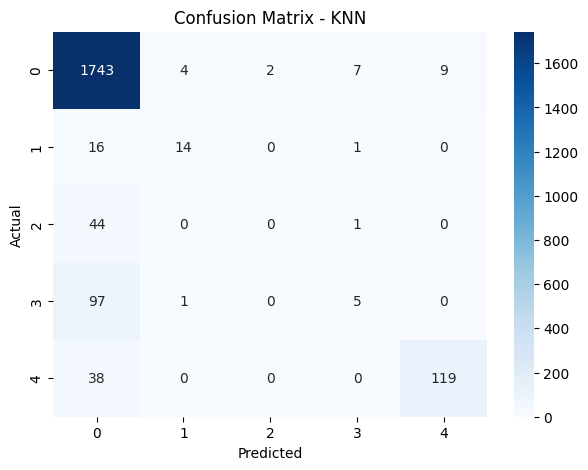

Confusion matrix saved as 'cfm_KNN_corrected.png'.
Model saved to 'KNN.pkl'.


In [ ]:
# KNN classification: KNN classifies a data point based on how its neighbors are classified. It looks at the 'K' closest points in the training data (based on distance, usually
# Euclidean) and assigns the most common label among them.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    classification_report, confusion_matrix
)
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import pickle

# Initialize and train the KNN model
model = KNeighborsClassifier(weights='distance')
model.fit(train_sentence_embeddings, train_labels_encoded)

# Make predictions
expected = test_labels_encoded
predicted = model.predict(test_sentence_embeddings)

# Evaluation Scores
print("Evaluation Scores:")
accuracy = accuracy_score(expected, predicted)
recall = recall_score(expected, predicted, average="macro", zero_division=1)
precision = precision_score(expected, predicted, average="macro", zero_division=1)
f1 = f1_score(expected, predicted, average="macro", zero_division=1)

print("Macro Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# Classification Report
# Use the correct number of target names based on unique labels in your dataset
unique_labels = np.unique(train_labels_encoded)
target_names = list(map(str, le.inverse_transform(unique_labels)))

print("\nClassification Report:")
print(classification_report(expected, predicted, labels=unique_labels, target_names=target_names, zero_division=1))

# Save Predictions
predictions = list(le.inverse_transform(predicted))  # Decode predictions
classified_df = pd.DataFrame({
    'tweets': test_sent_m,
    'actual_label': list(test_label_m),
    'predictions': predictions
})

# Save predictions to a CSV file
output_csv_path = 'KNN_corrected_predictions.csv'
classified_df.to_csv(output_csv_path, index=False)
print(f"Predictions saved to '{output_csv_path}'.")

# Confusion Matrix
cfm = confusion_matrix(expected, predicted, labels=unique_labels)
df_cfm = pd.DataFrame(cfm, index=target_names, columns=target_names)

plt.figure(figsize=(7, 5))
cfm_plot = sn.heatmap(df_cfm, annot=True, fmt='g', cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("cfm_KNN_corrected.png")
plt.show()
print("Confusion matrix saved as 'cfm_KNN_corrected.png'.")

# # Save the trained model
# pkl_filename = "KNN.pkl"
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(model, file)
# print(f"Model saved to '{pkl_filename}'.")

Evaluation Scores:
Macro Metrics:
Accuracy: 0.892
Precision: 0.973
Recall: 0.414
F1 Score: 0.464

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1765
           1       1.00      0.45      0.62        31
           2       1.00      0.00      0.00        45
           3       1.00      0.00      0.00       103
           4       0.98      0.62      0.76       157

    accuracy                           0.89      2101
   macro avg       0.97      0.41      0.46      2101
weighted avg       0.90      0.89      0.86      2101

Predictions saved to 'Random_Forest_corrected_predictions.csv'.


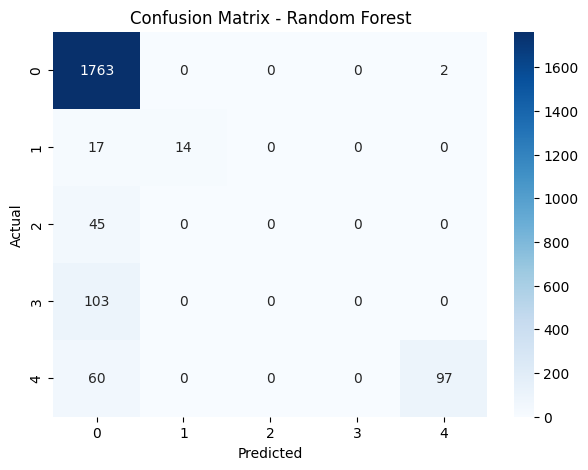

Model saved to 'random_forest.pkl'.


In [ ]:
# Random forest classification: Random Forest is an ensemble machine learning algorithm that builds many decision trees and combines their results to make more accurate and stable
# predictions.

# Import necessary libraries for Random Forest
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score,
    classification_report, confusion_matrix
)
import seaborn as sn
import matplotlib.pyplot as plt

# Random forest
# Define class weights
class_weight = {0: 0.22607331, 1: 23.54117647, 2: 13.69505703, 3: 17.07014218, 4: 2.484}

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, class_weight=class_weight, random_state=42)
model.fit(train_sentence_embeddings, train_labels_encoded)

# Make predictions
expected = test_labels_encoded
predicted = model.predict(test_sentence_embeddings)

# Ensure consistent handling of unseen labels
unique_train_labels = np.unique(train_labels_encoded)
filtered_expected = [
    label if label in unique_train_labels else -1
    for label in expected
]
filtered_predicted = [
    pred if pred in unique_train_labels else -1
    for pred in predicted
]

filtered_expected = np.array(filtered_expected)
filtered_predicted = np.array(filtered_predicted)
valid_indices = filtered_expected != -1
filtered_expected = filtered_expected[valid_indices]
filtered_predicted = filtered_predicted[valid_indices]

# Evaluation Scores
print("Evaluation Scores:")
accuracy = accuracy_score(filtered_expected, filtered_predicted)
recall = recall_score(filtered_expected, filtered_predicted, average="macro", zero_division=1)
precision = precision_score(filtered_expected, filtered_predicted, average="macro", zero_division=1)
f1 = f1_score(filtered_expected, filtered_predicted, average="macro", zero_division=1)

print("Macro Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

# Classification Report
target_names = list(map(str, le.inverse_transform(unique_train_labels)))
print("\nClassification Report:")
print(
    classification_report(
        filtered_expected,
        filtered_predicted,
        labels=unique_train_labels,
        target_names=target_names,
        zero_division=1,
    )
)

# Save Predictions
try:
    predictions = le.inverse_transform(predicted)  # Decode predictions
except ValueError:
    # Handle unseen labels
    predictions = [
        "unseen_label" if pred not in unique_train_labels else le.inverse_transform([pred])[0]
        for pred in predicted
    ]

classified_df = pd.DataFrame({
    'tweets': test_sent_m,
    'actual_label': list(test_label_m),  # Map to string labels
    'predictions': list(predictions)
})

output_csv_path = 'Random_Forest_corrected_predictions.csv'
classified_df.to_csv(output_csv_path, index=False)
print(f"Predictions saved to '{output_csv_path}'.")

# Confusion Matrix
cfm = confusion_matrix(filtered_expected, filtered_predicted, labels=unique_train_labels)
df_cfm = pd.DataFrame(cfm, index=target_names, columns=target_names)

plt.figure(figsize=(7, 5))
cfm_plot = sn.heatmap(df_cfm, annot=True, fmt='g', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("cfm_RF.png")
plt.show()

# # Save the trained model
# pkl_filename = "random_forest.pkl"
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(model, file)
# print(f"Model saved to '{pkl_filename}'.")

eval scores
macro
accuracy: 0.888
precision: 0.539
recall: 0.426
f1score: 0.460
Classification report
                                    precision    recall  f1-score   support

                     Not_offensive       0.90      0.99      0.94      1765
             Offensive_Untargetede       0.79      0.48      0.60        31
     Offensive_target_insult_Group       0.25      0.09      0.13        45
Offensive_target_insult_individual       0.38      0.15      0.21       103
                     not-malayalam       0.90      0.85      0.88       157
                           unknown       0.00      0.00      0.00        52

                          accuracy                           0.89      2153
                         macro avg       0.54      0.43      0.46      2153
                      weighted avg       0.84      0.89      0.86      2153

Prediction saved to SVM_RBF.csv


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


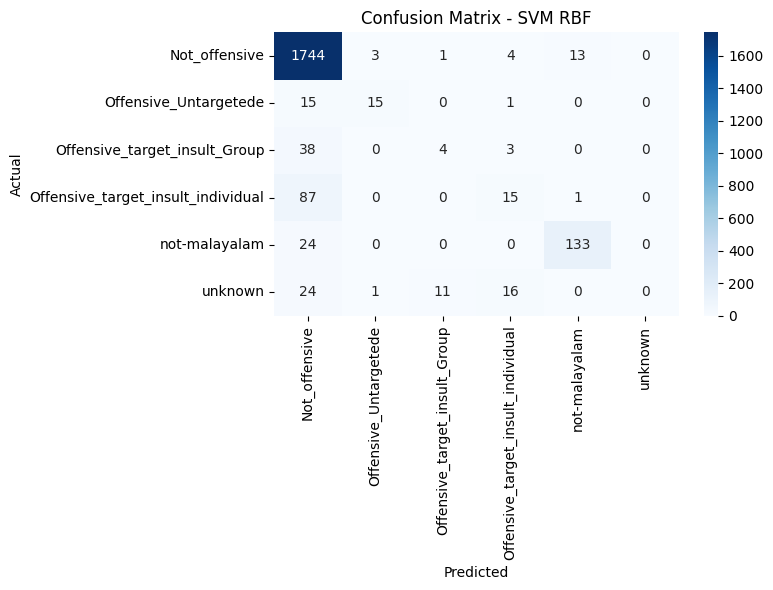

Confusion matrix saved to cfm_svm_rbf.png


In [8]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    classification_report, confusion_matrix
)
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

# Use the class weights you provided
class_weight = {0: 0.22607331, 1: 23.54117647, 2: 13.69505703, 3: 17.07014218, 4: 2.484}

# Define the SVM model with RBF kernel and class weights
model = svm.SVC(kernel='rbf', C=1000, class_weight=class_weight)

# Train the model
model.fit(train_sentence_embeddings, train_labels_encoded)

# Predict on the test data
expected = test_labels_encoded
predicted = model.predict(test_sentence_embeddings)

# Evaluation metrics
print("eval scores")
accuracy = accuracy_score(expected, predicted)
recall = recall_score(expected, predicted, average="macro")
precision = precision_score(expected, predicted, average="macro")
f1 = f1_score(expected, predicted, average="macro")

print("macro")
print(f"accuracy: {accuracy:.3f}")
print(f"precision: {precision:.3f}")
print(f"recall: {recall:.3f}")
print(f"f1score: {f1:.3f}")

# Get the actual class labels from the LabelEncoder
label_ids = le.transform(le.classes_)  # Ensures the correct order
target_names = le.classes_

print("Classification report")
report = classification_report(expected, predicted, labels=label_ids,
                               target_names=target_names, zero_division=0)
print(report)

# Save predictions to CSV
predictions_inversed = list(le.inverse_transform(predicted))
classified_df = pd.DataFrame({'tweets': test_sent_m,
                              'actual_label': test_label_m,
                              'predictions': predictions_inversed})
classified_df.to_csv('SVM_RBF.csv', index=False)
print("Prediction saved to SVM_RBF.csv")

# Confusion Matrix
cfm = confusion_matrix(expected, predicted, labels=label_ids)
df_cfm = pd.DataFrame(cfm, index=target_names, columns=target_names)
plt.figure(figsize=(8, 6))
sn.heatmap(df_cfm, annot=True, fmt='g', cmap='Blues')
plt.title("Confusion Matrix - SVM RBF")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("cfm_svm_rbf.png")
plt.show()
print("Confusion matrix saved to cfm_svm_rbf.png")


Training started...
Training complete.
eval scores
macro
accuracy: 0.888
precision: 0.531
recall: 0.431
f1score: 0.464
Classification report
                                    precision    recall  f1-score   support

                     Not_offensive       0.90      0.99      0.94      1765
             Offensive_Untargetede       0.71      0.48      0.58        31
     Offensive_target_insult_Group       0.26      0.11      0.16        45
Offensive_target_insult_individual       0.38      0.16      0.22       103
                     not-malayalam       0.92      0.85      0.88       157
                           unknown       0.00      0.00      0.00        52

                          accuracy                           0.89      2153
                         macro avg       0.53      0.43      0.46      2153
                      weighted avg       0.84      0.89      0.86      2153

Predictions saved to SVM_poly_labse.csv


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


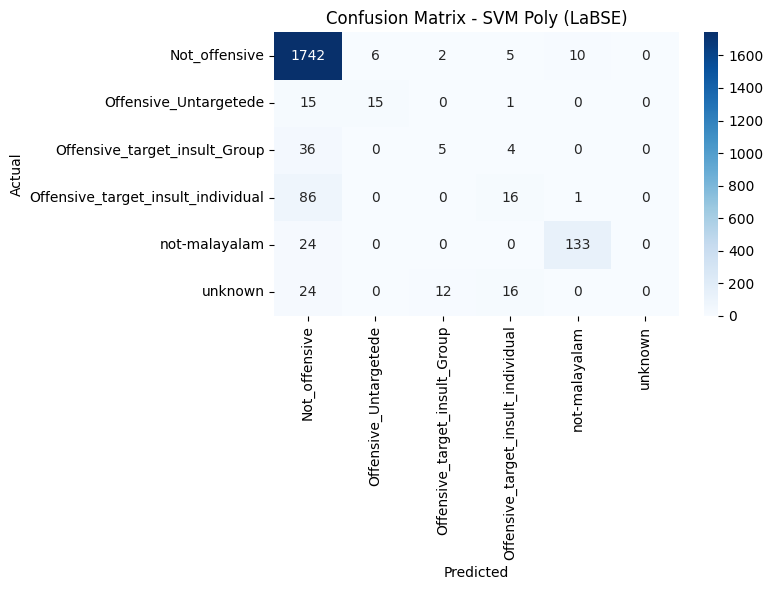

Confusion matrix saved as cfm_SVM_poly_labse.png


In [12]:
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    classification_report, confusion_matrix
)
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import pickle

# Optional: reduce degree or C for faster training if needed
model = SVC(kernel='poly', degree=3, C=100, class_weight='balanced')  # adjusted for speed

# Train the model
print("Training started...")
model.fit(train_sentence_embeddings, train_labels_encoded)
print("Training complete.")

# Predict on the dev set
expected = test_labels_encoded
predicted = model.predict(test_sentence_embeddings)

# Evaluation metrics
print("eval scores")
accuracy = accuracy_score(expected, predicted)
recall = recall_score(expected, predicted, average="macro")
precision = precision_score(expected, predicted, average="macro")
f1 = f1_score(expected, predicted, average="macro")

print("macro")
print(f"accuracy: {accuracy:.3f}")
print(f"precision: {precision:.3f}")
print(f"recall: {recall:.3f}")
print(f"f1score: {f1:.3f}")

# Generate classification report
print("Classification report")
target_names = le.classes_  # Make sure this matches label encoding
labels = le.transform(target_names)  # Label IDs in correct order
print(classification_report(expected, predicted, labels=labels,
                            target_names=target_names, zero_division=0))

# Save predictions
predictions_inversed = list(le.inverse_transform(predicted))
classified_df = pd.DataFrame({
    'tweets': test_sent_m,  # assuming this is the input sentence list
    'actual_label': le.inverse_transform(expected),
    'predictions': predictions_inversed
})
classified_df.to_csv('SVM_poly_labse.csv', index=False)
print("Predictions saved to SVM_poly_labse.csv")

# # Save model
# with open("poly_labse.pkl", 'wb') as file:
#     pickle.dump(model, file)
# print("Model saved as poly_labse.pkl")

# Confusion matrix
cfm = confusion_matrix(expected, predicted, labels=labels)
df_cfm = pd.DataFrame(cfm, index=target_names, columns=target_names)
plt.figure(figsize=(8, 6))
cfm_plot = sn.heatmap(df_cfm, annot=True, fmt='g', cmap='Blues')
plt.title("Confusion Matrix - SVM Poly (LaBSE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("cfm_SVM_poly_labse.png")
plt.show()
print("Confusion matrix saved as cfm_SVM_poly_labse.png")


In [4]:
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    classification_report, confusion_matrix
)
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import pickle

# --- Model Training ---
model = SVC(kernel='linear', C=10, class_weight='balanced')  # handle class imbalance
print("Training started...")
model.fit(train_sentence_embeddings, train_labels_encoded)
print("Training completed.")

# --- Prediction ---
expected = test_labels_encoded
predicted = model.predict(test_sentence_embeddings)

# --- Evaluation ---
print("eval scores")
accuracy = accuracy_score(expected, predicted)
recall = recall_score(expected, predicted, average="macro")
precision = precision_score(expected, predicted, average="macro")
f1 = f1_score(expected, predicted, average="macro")

print("macro")
print(f"accuracy: {accuracy:.3f}")
print(f"precision: {precision:.3f}")
print(f"recall: {recall:.3f}")
print(f"f1score: {f1:.3f}")

# --- Classification Report ---
print("Classification report")
target_names = le.classes_  # from LabelEncoder setup
labels = le.transform(target_names)  # ensure label alignment
print(classification_report(expected, predicted, labels=labels,
                            target_names=target_names, zero_division=0))

# --- Save Predictions ---
predictions_inversed = le.inverse_transform(predicted)
actual_inversed = le.inverse_transform(expected)
classified_df = pd.DataFrame({
    'tweets': test_sent_m,
    'actual_label': actual_inversed,
    'predictions': predictions_inversed
})
classified_df.to_csv('SVM_linear_labse.csv', index=False)
print("Predictions saved to SVM_linear_labse.csv")

# # --- Save Model ---
# with open("linear_labse.pkl", 'wb') as file:
#     pickle.dump(model, file)
# print("Model saved as linear_labse.pkl")

# --- Confusion Matrix ---
cfm = confusion_matrix(expected, predicted, labels=labels)
df_cfm = pd.DataFrame(cfm, index=target_names, columns=target_names)
plt.figure(figsize=(8, 6))
cfm_plot = sn.heatmap(df_cfm, annot=True, fmt='g', cmap='Blues')
plt.title("Confusion Matrix - SVM Linear (LaBSE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("cfm_SVM_linear_labse.png")
plt.show()
print("Confusion matrix saved as cfm_SVM_linear_labse.png")


Training started...


NameError: name 'train_sentence_embeddings' is not defined